In [2]:
import torch

In [3]:
x = torch.tensor(10)
x

tensor(10)

In [4]:
y = x**2
y

tensor(100)

In [5]:
z = torch.log(y)
# torch.log() is natural log (e)   torch.log2() is log with base 2.  torch.log10() is log with base 10
z

tensor(4.6052)

In [6]:
def dy_dx(x):
  return 2*x
def dz_dy(y):
  return 1/y
def dz_dx(x):
  y = x**2
  return (dz_dy(y) * dy_dx(x))  # chain rule of differentiation
print(dz_dx(x))

tensor(0.2000)


In [7]:
x = torch.tensor(10.0, requires_grad=True) # for calculating gradients the datatype should be floating point
x

tensor(10., requires_grad=True)

In [8]:
y = x**2
y

tensor(100., grad_fn=<PowBackward0>)

In [9]:
z = torch.log(y)
z

tensor(4.6052, grad_fn=<LogBackward0>)

In [10]:
z.backward() # this is where all the magic happens

In [11]:
print(x.grad) # printing dz/dx (gradient w.r.t x)

tensor(0.2000)


# Use of AutoGrad in Neural Networks

While updating the weights in backpropagation algo you need to calculate the gradient of **Loss** **w.r.t** that **weight**.
We can do that much faster by using the AutoGrad engine provided by PyTorch.


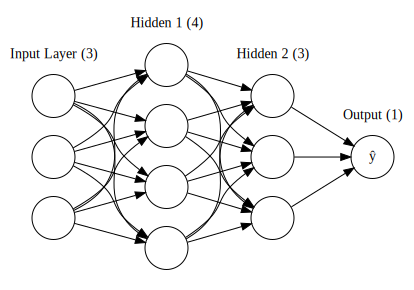

In [12]:
# @title
from graphviz import Digraph

dot = Digraph(comment='Dense Neural Network')
dot.attr(rankdir='LR')  # Left to Right
dot.attr(newrank='true') # Critical fix: allows rank=same inside clusters

# Common node style
dot.attr('node', shape='circle', fixedsize='true', width='0.6', style='filled', fillcolor='white')

# 1. Input Layer
with dot.subgraph(name='cluster_input') as c:
    c.attr(color='white', label='Input Layer (3)')
    c.attr(rank='same')
    c.node('I1', '')  # <--- Label is now empty
    c.node('I2', '')
    c.node('I3', '')

# 2. Hidden Layer 1
with dot.subgraph(name='cluster_h1') as c:
    c.attr(color='white', label='Hidden 1 (4)')
    c.attr(rank='same')
    for i in range(1, 5):
        c.node(f'H1_{i}', '') # <--- Label is now empty

# 3. Hidden Layer 2
with dot.subgraph(name='cluster_h2') as c:
    c.attr(color='white', label='Hidden 2 (3)')
    c.attr(rank='same')
    for i in range(1, 4):
        c.node(f'H2_{i}', '') # <--- Label is now empty

# 4. Output Layer
with dot.subgraph(name='cluster_output') as c:
    c.attr(color='white', label='Output (1)')
    c.attr(rank='same')
    c.node('O1', 'ŷ')

# Define Edges (Standard)
# Input -> Hidden 1
for i in range(1, 4):
    for j in range(1, 5):
        dot.edge(f'I{i}', f'H1_{j}')

# Hidden 1 -> Hidden 2
for i in range(1, 5):
    for j in range(1, 4):
        dot.edge(f'H1_{i}', f'H2_{j}')

# Hidden 2 -> Output
for i in range(1, 4):
    dot.edge(f'H2_{i}', 'O1')

dot

In [171]:
torch.manual_seed(10)
x = torch.randint(size=(3,1), low = 0, high = 10)
x = x.to(torch.float32)
x.dtype

torch.float32

In [205]:
torch.manual_seed(42)
w1 = torch.randn(size=(3,4), requires_grad=True)
b1 = torch.randn(size=(4,1), requires_grad=True)
w2 = torch.randn(size=(4,3), requires_grad=True)
b2 = torch.randn(size=(3,1), requires_grad=True)
w3 = torch.randn(size=(3,1), requires_grad=True)
b3 = torch.randn(size=(1,1), requires_grad=True)
w1,b1,w2,b2,w3,b3

(tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
         [-1.1229, -0.1863,  2.2082, -0.6380],
         [ 0.4617,  0.2674,  0.5349,  0.8094]], requires_grad=True),
 tensor([[ 1.1103],
         [-1.6898],
         [-0.9890],
         [ 0.9580]], requires_grad=True),
 tensor([[ 1.3221,  0.8172, -0.7658],
         [-0.7506,  1.3525,  0.6863],
         [-0.3278,  0.7950,  0.2815],
         [ 0.0562,  0.5227, -0.2384]], requires_grad=True),
 tensor([[-0.0499],
         [ 0.5263],
         [-0.0085]], requires_grad=True),
 tensor([[0.7291],
         [0.1331],
         [0.8640]], requires_grad=True),
 tensor([[-1.0157]], requires_grad=True))

In [206]:
w1_t = torch.transpose(w1, 0, 1)
z1 = torch.matmul(w1_t,x) + b1
z1

tensor([[-1.2238],
        [-1.1851],
        [12.7631],
        [ 0.9990]], grad_fn=<AddBackward0>)

In [207]:
z1 = torch.relu(z1)
z1

tensor([[ 0.0000],
        [ 0.0000],
        [12.7631],
        [ 0.9990]], grad_fn=<ReluBackward0>)

In [208]:
w2_t = torch.transpose(w2,0,1)
z2 = torch.matmul(w2_t,z1) + b2
z2

tensor([[-4.1770],
        [11.1948],
        [ 3.3464]], grad_fn=<AddBackward0>)

In [209]:
z2 = torch.relu(z2)
z2

tensor([[ 0.0000],
        [11.1948],
        [ 3.3464]], grad_fn=<ReluBackward0>)

In [210]:
w3_t = torch.transpose(w3,0,1)
w3_t

tensor([[0.7291, 0.1331, 0.8640]], grad_fn=<TransposeBackward0>)

In [297]:
z3 = torch.matmul(w3_t,z2) + b3
z3

tensor([[3.3661]], grad_fn=<AddBackward0>)

In [300]:
y_pred = torch.sigmoid(z3) # binary classification problem and output layer --> so the activation function will be sigmoid.
y_pred

tensor([[0.9666]], grad_fn=<SigmoidBackward0>)

The formula for **Binary Cross Entropy Loss** is:

$$
Loss = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Where:
* $N$ is the number of samples.
* $y_i$ is the actual label (0 or 1).
* $\hat{y}_i$ is the predicted probability.

In [213]:
def binary_cross_entropy(y_true, y_pred):
    # 1. Clip predictions to avoid log(0) error
    epsilon = 1e-15
    y_pred = torch.clamp(y_pred, min=epsilon, max=1 - epsilon)

    # 2. Calculate the loss formula
    loss = -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

    return loss

In [301]:
w1.grad.zero_()
w1_t = torch.transpose(w1, 0, 1)
z1 = torch.matmul(w1_t,x) + b1
z1 = torch.relu(z1)

w2_t = torch.transpose(w2,0,1)
z2 = torch.matmul(w2_t,z1) + b2
z2 = torch.relu(z2)

w3_t = torch.transpose(w3,0,1)
z3 = torch.matmul(w3_t,z2) + b3
y_pred = torch.sigmoid(z3)

loss = binary_cross_entropy(1, y_pred)
loss
loss.backward() # this is where all the magic happens
print(w1.grad) # gradient suffers from the problem of gradient accumulation
print(loss)

tensor([[ 0.0000,  0.0000, -0.0815,  0.0319],
        [ 0.0000,  0.0000, -0.0582,  0.0228],
        [ 0.0000,  0.0000, -0.0233,  0.0091]])
tensor(0.0339, grad_fn=<NegBackward0>)


In [302]:
w2

tensor([[ 1.3221,  0.8172, -0.7658],
        [-0.7506,  1.3525,  0.6863],
        [-0.3278,  0.7950,  0.2815],
        [ 0.0562,  0.5227, -0.2384]], requires_grad=True)

In [260]:
print(w2.grad)

tensor([[ 0.0000,  0.0000, -0.0815,  0.0319],
        [ 0.0000,  0.0000, -0.0582,  0.0228],
        [ 0.0000,  0.0000, -0.0233,  0.0091]])


In [217]:
w3

tensor([[ 1.3221,  0.8172, -0.7658],
        [-0.7506,  1.3525,  0.6863],
        [-0.3278,  0.7950,  0.2815],
        [ 0.0562,  0.5227, -0.2384]], requires_grad=True)

In [218]:
print(w3.grad)

tensor([[ 0.0000, -0.0000, -0.0000],
        [ 0.0000, -0.0000, -0.0000],
        [ 0.0000, -0.0567, -0.3680],
        [ 0.0000, -0.0044, -0.0288]])


In [219]:
b1,b2,b3

(tensor([[ 1.1103],
         [-1.6898],
         [-0.9890],
         [ 0.9580]], requires_grad=True),
 tensor([[-0.0499],
         [ 0.5263],
         [-0.0085]], requires_grad=True),
 tensor([[-1.0157]], requires_grad=True))

In [220]:
print(b3.grad)

tensor([[-0.0334]])


In [197]:
a = torch.tensor([1.0 , 2.0], requires_grad=True)
b = torch.tensor([3.0 , 4.0], requires_grad=True)

In [272]:
c = a+b
a.grad.zero_() # everytime need to do this before using tensor.backward() attribute otherwise gradients will keep on adding
c.backward(torch.ones_like(c))
print(a.grad)

tensor([1., 1.])


In [273]:
# Disabling gradient tracking
with torch.no_grad():
    a = a + b
a

tensor([4., 6.])